In [13]:
import numpy as np
import joblib
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load processed sequences
sequences = np.load("../data/processed/tokenized_sequences.npy")
tokenizer = joblib.load('../models/tokenizer.pkl')

In [3]:
# Split into train and target
X_train, y_train = sequences[:, :-1], sequences[:, -1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

In [4]:
# Build RNN model
D = 512
V = len(tokenizer.word_index) + 1
T = X_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V, D)(i)
x = Dropout(0.2)(x)
x = SimpleRNN(150)(x)
x = Dense(V, activation="softmax")(x)
rnn_model = Model(i, x)

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 embedding (Embedding)       (None, 29, 512)           30889984  
                                                                 
 dropout (Dropout)           (None, 29, 512)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               99450     
                                                                 
 dense (Dense)               (None, 60332)             9110132   
                                                                 
Total params: 40099566 (152.97 MB)
Trainable params: 40099566 (152.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
189/189 [==============================] - 95s 499ms/step - loss: 8.0851 - accuracy: 0.0491
Epoch 2/50
189/189 [==============================] - 96s 506ms/step - loss: 6.5032 - accuracy: 0.0762
Epoch 3/50
189/189 [==============================] - 91s 481ms/step - loss: 5.9553 - accuracy: 0.0977
Epoch 4/50
189/189 [==============================] - 85s 448ms/step - loss: 5.5512 - accuracy: 0.1268
Epoch 5/50
189/189 [==============================] - 88s 466ms/step - loss: 5.1413 - accuracy: 0.1590
Epoch 6/50
189/189 [==============================] - 95s 501ms/step - loss: 4.6879 - accuracy: 0.2056
Epoch 7/50
189/189 [==============================] - 95s 501ms/step - loss: 4.2653 - accuracy: 0.2562
Epoch 8/50
189/189 [==============================] - 93s 495ms/step - loss: 3.8258 - accuracy: 0.3121
Epoch 9/50
189/189 [==============================] - 95s 501ms/step - loss: 3.4121 - accuracy: 0.3718
Epoch 10/50
189/189 [==============================] - 95s 500ms/step - l

In [8]:
# Save the trained RNN model
#rnn_model.save('../models/rnn_text_generation_model.keras')

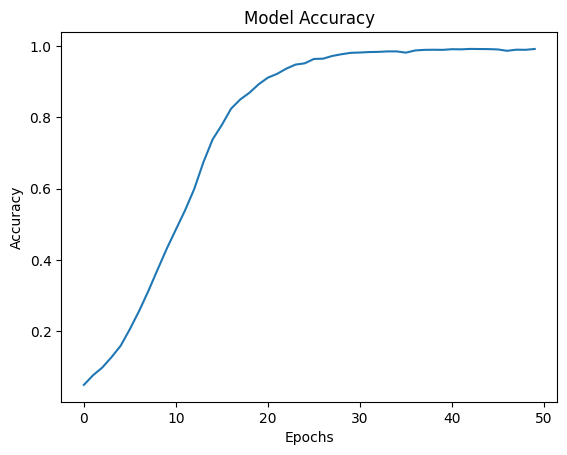

In [17]:
plt.plot(rnn_model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('../plots/rnn_model_training.png')
plt.show()